# Word embeddings

A word embedding model is created with the previous pre-processed tweets data in order to prepare it to feed a deep learning algorithm.
The model is created with the help of the Gensim library and the Word2Vec algorithm.

In [4]:
# Importing libraries
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk

In [74]:
# Ignoring gensim deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [10]:
# Reading the pickled corpus
df = pd.read_pickle('corpus.pkl')
df

,tweet
0,she should ask a few native americans what th...
1,go home you’re drunk
2,amazon is investigating chinese employees who ...
3,someone should'vetaken this piece of shit to ...
4,obama wanted liberals amp illegals to move in...
...,...
13235,sometimes i get strong vibes from people and ...
13236,benidorm creamfields maga not too shabby of a ...
13237,and why report this garbage we don't give a crap
13238,pussy


In [12]:
# Extracting only tweets strings
tweets = df['tweet'].values
tweets

array([' she should ask a few native americans what their take on this is',
       ' go home you’re drunk ',
       'amazon is investigating chinese employees who are selling internal data to thirdparty sellers looking for an edge in the competitive marketplace  ',
       ..., " and why report this garbage we don't give a crap", ' pussy',
       ' vs and is a '], dtype=object)

In [15]:
# This line only need to be executed once.
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raulc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
# Tokenize tweets
tweetsVec = [nltk.word_tokenize(tweet) for tweet in tweets]

In [20]:
# Watching tokenized tweets
tweetsVec[:3]

[['she',
  'should',
  'ask',
  'a',
  'few',
  'native',
  'americans',
  'what',
  'their',
  'take',
  'on',
  'this',
  'is'],
 ['go', 'home', 'you', '’', 're', 'drunk'],
 ['amazon',
  'is',
  'investigating',
  'chinese',
  'employees',
  'who',
  'are',
  'selling',
  'internal',
  'data',
  'to',
  'thirdparty',
  'sellers',
  'looking',
  'for',
  'an',
  'edge',
  'in',
  'the',
  'competitive',
  'marketplace']]

In [52]:
# Intantiating the word2vec model with the tweets
model = Word2Vec(tweetsVec, sg=1,min_count=1, size=32)

In [54]:
# Try the model, searching for similar context words
model.wv.most_similar('president')

[('donald', 0.9218945503234863),
 ('supporters', 0.9173102378845215),
 ('trump', 0.8886902928352356),
 ('america', 0.8876305222511292),
 ('elected', 0.8873960971832275),
 ('bless', 0.8711894154548645),
 ('economy', 0.8646500706672668),
 ('names', 0.8630778193473816),
 ('office', 0.8597269058227539),
 ('mr', 0.8532628417015076)]

In [77]:
# Searching for similar context words
model.wv.most_similar([model['president'] + model['racist']])

[('president', 0.9576005339622498),
 ('donald', 0.9540096521377563),
 ('elected', 0.94614577293396),
 ('successful', 0.942066490650177),
 ('running', 0.9411432147026062),
 ('everyday', 0.9411176443099976),
 ('mr', 0.9403417110443115),
 ('trumps', 0.9363796710968018),
 ('worst', 0.9357656240463257),
 ('hearing', 0.933832049369812)]

In [76]:
# Watching the embedding
model['liberals']

array([-1.0181432e-01, -6.3804859e-01,  8.5113764e-01,  2.5683653e-01,
       -5.6336392e-02, -3.7355831e-01, -8.2846753e-02, -5.9428388e-01,
       -1.2152272e-01, -5.2633029e-01, -7.7832365e-01, -1.8067653e-01,
        6.1785817e-01, -8.0049145e-01,  3.3926737e-02,  3.9009708e-01,
       -4.1866809e-04, -3.9191800e-01, -2.6297250e-01,  2.5312582e-01,
        2.0808209e-01, -1.3070372e-01, -9.1949046e-01, -1.0082793e+00,
       -6.6766238e-01, -1.2877797e-01,  9.7716016e-01,  1.7283945e-01,
        4.5947799e-01, -4.7760308e-01,  2.5592345e-01, -5.2014556e-02],
      dtype=float32)

A dimentionality reduction is performed on the generated vectors in order to plot them in the 2D plane and be able to see the distance representing similarity between each word vector.

In [82]:
# Importing library for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [100]:
# Extracting model vocabulary
vocabulary = model.wv.vocab

In [101]:
# Instantiate the PCA object
pca = PCA(n_components=2)

In [102]:
# Performirng the dimentionality reduction
fit_pca = pca.fit_transform(model[vocabulary])

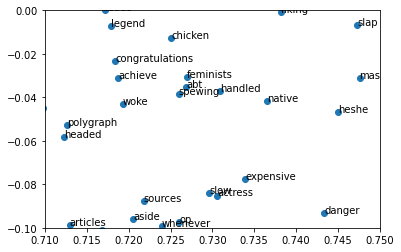

In [147]:
# Plotting
plt.figure(figsize=(6,4))
plt.scatter(fit_pca[:,0], fit_pca[:,1])
plt.xlim(0.71,0.75)
plt.ylim(-0.1,0)
# Annotate
for i, word in enumerate(vocabulary):
    plt.annotate(word, xy=(fit_pca[i,0], fit_pca[i,1]),clip_on=True)
plt.show()